# **Sentiment Analysis**
- In this notebook we carry out a sentiment analysis on reviews data from Amazon and Yelp.
- In this notebook will make use of sub words.

## **Libraries**
- Now will import libraries and dependances used in this notebook.
- We will user tensorflow and its preprocessing function for text data.
- Will also use pandas and numpy in preprocessing the data.

In [28]:
import io
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [29]:
Tokenizer = tf.keras.preprocessing.text.Tokenizer
pad_sequences =  tf.keras.preprocessing.sequence.pad_sequences
keras = tf.keras
Sequential = tf.keras.Sequential

## **Import Data**
- The data will be using in this notebook was pulled from kaggle, cleaned and saved on google drive.
- We will now download the data used in this notebook which is saved on google drive.

In [30]:
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2022-07-22 02:55:49--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 142.251.18.113, 142.251.18.101, 142.251.18.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.18.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vbvhg13vj7na16kg1il5pn82t2fpm55s/1658458500000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=ec44780c-978f-49b0-a55f-c87c2827f319 [following]
--2022-07-22 02:55:49--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vbvhg13vj7na16kg1il5pn82t2fpm55s/1658458500000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=ec44780c-978f-49b0-a55f-c87c2827f319
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 142.251.31.132, 2a00:1450:4013:c1a::84
Connecting to doc-08

In [31]:
dataset = pd.read_csv('/tmp/sentiment.csv')
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


## **Preprocessing**
- Now will preprocess our data.
- Firstly will convert the different column in dataset into lists.

In [32]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

## **Creating the subwords dataset**
- Now will create the subwords dataset with vocal_size of 1000 and at most 5 characters per subword.

In [33]:
vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length = 5)

In [34]:
num = 5 
print(sentences[5])
encoded = tokenizer.encode(sentences[num])
print(encoded)

for i in encoded:
  print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


__Comments__
- Now will split both the sentences and labels into training and testing datasets.
- We make 80% of the data our trainning set and 20% testing set.
- We will also convert our train and testing list into numpy array for tensorflow.

### ### **Tokenization**
- Now will replace the sentences data with the encoded subwords

In [35]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


__Comments__
- Will finish the rest of the preprocessing.
- Here are some of the parameters will be using
  1. Maximum length of our sequences will be 50
  2. We will use post padding for sequences less than 100 and post truncating for sequence with words greater than 50.


In [36]:
#vocab_size = 500
max_length = 50
padding_type = 'post'
trunc_type = 'post'
#oov_tok = '<OOV>'

In [37]:
training_size = int(len(sentences)*0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

training_labels_np = np.array(training_labels)
testing_labels_np = np.array(testing_labels)

In [38]:
padded_training_sequences = pad_sequences(training_sentences, maxlen = max_length, 
                                          padding = padding_type, truncating = trunc_type)

padded_testing_sequences = pad_sequences(testing_sentences, maxlen = max_length, 
                                          padding = padding_type, truncating = trunc_type)

__Comments__
- Now will review our preprocessing results.
- We check the value in the word index of words appearing the sentence shown.

In [39]:
print('1st sentence: ', training_sentences[:1])
print('1st padded training sequences: ', padded_training_sequences[:1])

1st sentence:  [[736, 168, 775, 7, 193, 417, 17, 94, 6, 600, 438, 775, 14, 19, 141, 19, 1, 828, 826, 775, 99, 445, 4, 174, 361, 5, 79, 227, 139, 789]]
1st padded training sequences:  [[736 168 775   7 193 417  17  94   6 600 438 775  14  19 141  19   1 828
  826 775  99 445   4 174 361   5  79 227 139 789   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


## **Sentiment Model**
- Now that we are done with preprocessing our data, we now build our model for sentiment classifications.
- For this will make use of the Embedding layer in tensorflow keras.
- This will make each unique word in our vocabular a vector in the embedding dimension.
- This will allow the model to determine the how those words appear in negative or positive sentiments.
- Now will set our embedding dimesion to 16.

In [40]:
embedding_dim = 16

__Comments__
- Our model will have the following layers.
  1. The input layers will be the Embedding layers and the input length will match the maximum length for each sequence.
  2. Will flatten the results of the embedding layer to move it for the 16 dimension to the 2D for the following dense layers.
  3. Now will have a dense layer with 16 units and relu activation
  4. The output layer is a dense layer with 1 unit as have to output states and has sigmoid activation function for binary classification.

In [41]:
model = Sequential([
                    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                    keras.layers.GlobalAveragePooling1D(),#keras.layers.Flatten(),
                    keras.layers.Dense(16, activation = 'relu'),
                    keras.layers.Dense(1) #, activation = 'sigmoid'
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,289
Trainable params: 16,289
Non-trainable params: 0
_________________________________________________________________


### **Model Compiling**
- For compling our model will make use of the binary cross enthropy loss function.
- We will also use the adam optimizer and accuracy as our metric to measure.

In [42]:
model.compile(loss = keras.losses.BinaryCrossentropy(from_logits = True), 
              optimizer = 'adam', metrics = ['accuracy']) #'binary_crossentropy'

### **Training Model**
- Now will train our model using 10 epochs.

In [43]:
EPOCHS = 30
history = model.fit(padded_training_sequences, training_labels_np, epochs = EPOCHS,
          validation_data = (padded_testing_sequences, testing_labels_np))

Epoch 1/30
50/50 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.4777 - val_loss: 0.6987 - val_accuracy: 0.5890
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.4777 - val_loss: 0.6967 - val_accuracy: 0.5890
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.4777 - val_loss: 0.6941 - val_accuracy: 0.5890
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.4777 - val_loss: 0.6809 - val_accuracy: 0.5890
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.4777 - val_loss: 0.6563 - val_accuracy: 0.5890
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6101 - accuracy: 0.5612 - val_loss: 0.6175 - val_accuracy: 0.6316
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.7106 - val_loss: 0.5859 - val_accuracy: 0.7043
Epoch 8/30
50/50 [==

### Training Results
- Now will look at the reuslt of the training process.

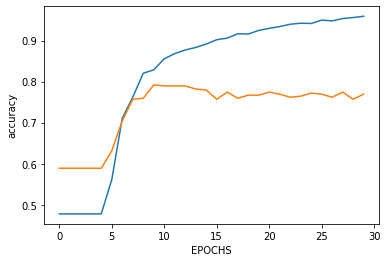

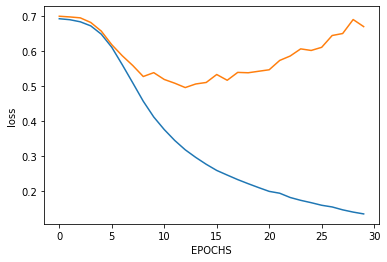

In [44]:
def plot_results(model_history, metric):
  plt.plot(model_history.history[metric], label = metric)
  plt.plot(model_history.history['val_'+metric], label = 'val_'+metric)
  plt.xlabel('EPOCHS')
  plt.ylabel(metric)
  plt.show()

plot_results(history, 'accuracy')
plot_results(history, 'loss')

### Visualising Network
- Now will visualize the embedding and see each word relative to the sentiment.

In [45]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [46]:
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(0, vocab_size-1):
  word =tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([ str(x) for x in embeddings]) + '\n')

out_v.close()
out_m.close()

In [47]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusion**
- Make use of subwords, did not improve much of the peformance of the model as compare to the one using whole words.
- Sub-words resulted in over traning as the accuracy of the test data started decreasing after about 7 epochs and loss of the test data increased after about 12 epochs.
- When we visualise the embedding of the sub-words, they is no clear separation of the sentiments.